In [10]:
import numpy as np
from matplotlib import pyplot as plt
import random
import pandas as pd
%matplotlib inline

In [11]:
def conv_forward(inputx,kernel_size,pad,filters,params = None):
    # inputx should be like (batch_number,channel,width,height)
    N, C, H, W = inputx.shape
    if params is None:
        w = np.random.randn(filters,C,kernel_size,kernel_size)
        b = np.random.randn(filters)
    else:
        (w,b) = params
    
    x_pad = np.pad(inputx, ((0, 0), (0, 0), (pad, pad), (pad, pad)), mode='constant')
    x_pad_H,x_pad_W = x_pad.shape[2:]
    
    
    x_out = np.zeros((N, filters, x_pad_H - kernel_size + 1, x_pad_W - kernel_size + 1))
    for n in range(N):
        for f in range(filters):
            for i in range(x_pad_H - kernel_size + 1):
                for j in range(x_pad_W - kernel_size + 1):
                    begin_x_cord = i
                    end_x_cord = i + kernel_size
                    begin_y_cord = j 
                    end_y_cord = j + kernel_size
                    window = x_pad[n,:,begin_x_cord:end_x_cord,begin_y_cord:end_y_cord]
                    x_out[n,f,i,j] = np.sum(window * w[f]) + b[f]
    #print((N, filters, x_pad_H - kernel_size, x_pad_W - kernel_size))
    return x_out,(w,b)            

def conv_backword(x_input,dy,params,kernel_size,pad,filters):
    (w,b) = params
    x_pad = np.pad(x_input, ((0, 0), (0, 0), (pad, pad), (pad, pad)), 'constant')
    dx_pad = np.zeros_like(np.pad(x_input, ((0, 0), (0, 0), (pad, pad), (pad, pad)), 'constant'))
    N, C, H, W = x_input.shape
    x_pad_H,x_pad_W = x_pad.shape[2:]
    
    dx = np.zeros_like(x_input)
    dw = np.zeros_like(w)
    db = np.zeros_like(b)
    for n in range(N):       # ith image
        for f in range(filters):   # fth filter
            for i in range(x_pad_H - kernel_size + 1):
                for j in range(x_pad_W - kernel_size + 1):
                    begin_x_cord = i
                    end_x_cord = i + kernel_size
                    begin_y_cord = j 
                    end_y_cord = j + kernel_size
                    window = x_pad[n,:,begin_x_cord:end_x_cord,begin_y_cord:end_y_cord]
                    db[f] += dy[n, f, i, j]
                    dw[f] += dy[n, f, i, j] * window
                    dx_pad[n,:,begin_x_cord:end_x_cord,begin_y_cord:end_y_cord] += w[f] * dy[n, f, i, j]
    dx = dx_pad[:, :, pad:pad+H, pad:pad+W]
    return dx,(dw,db)

In [12]:
inputx = np.random.randn(2,1,3,3)

In [13]:
conved_x,conv_param = conv_forward(inputx,3,1,3)
dx,(dw,db) = conv_backword(inputx,2 * conved_x,conv_param,3,1,3)

In [14]:
db

array([ -4.72576196,  34.03165233, -10.14587913])

In [15]:
conv_param[1]

array([ 0.32292054,  0.8367935 ,  0.34272512])

In [16]:
lr = 0.001
log = []
for i in range(3000):
    conved_x,_ = conv_forward(inputx,3,1,3,conv_param)
    dx,(dw,db) = conv_backword(inputx,2 * conved_x,conv_param,3,1,3)
    
    (w,b) = conv_param
    w -= dw * lr
    b -= db * lr
    
    loss = np.sum(conved_x * conved_x)
    log.append(loss)

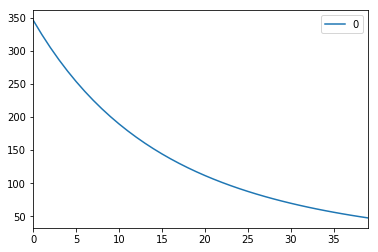

In [17]:
pd.DataFrame(log[:40]).plot()